#### Problem Statement
- This task relates to the final model creation aspect of the analysis. The requirement is to build the final model with the highest performance scores.

In [1]:
#Importing The necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

 # Read the data set
df =pd.read_csv('heart_disease.csv')

# check the head of the data 
df.head()

# Shape of the data set
df.shape

df.info()

df.drop(['education'],axis=1,inplace=True)

# Check for Null Values
df.isnull().sum()


df.dropna(axis=0,inplace=True)

#EDA

df.describe()


# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :     # as there are 15 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()



# Check for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

df.TenYearCHD.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


<Figure size 2000x2500 with 15 Axes>

0    3179
1     572
Name: TenYearCHD, dtype: int64

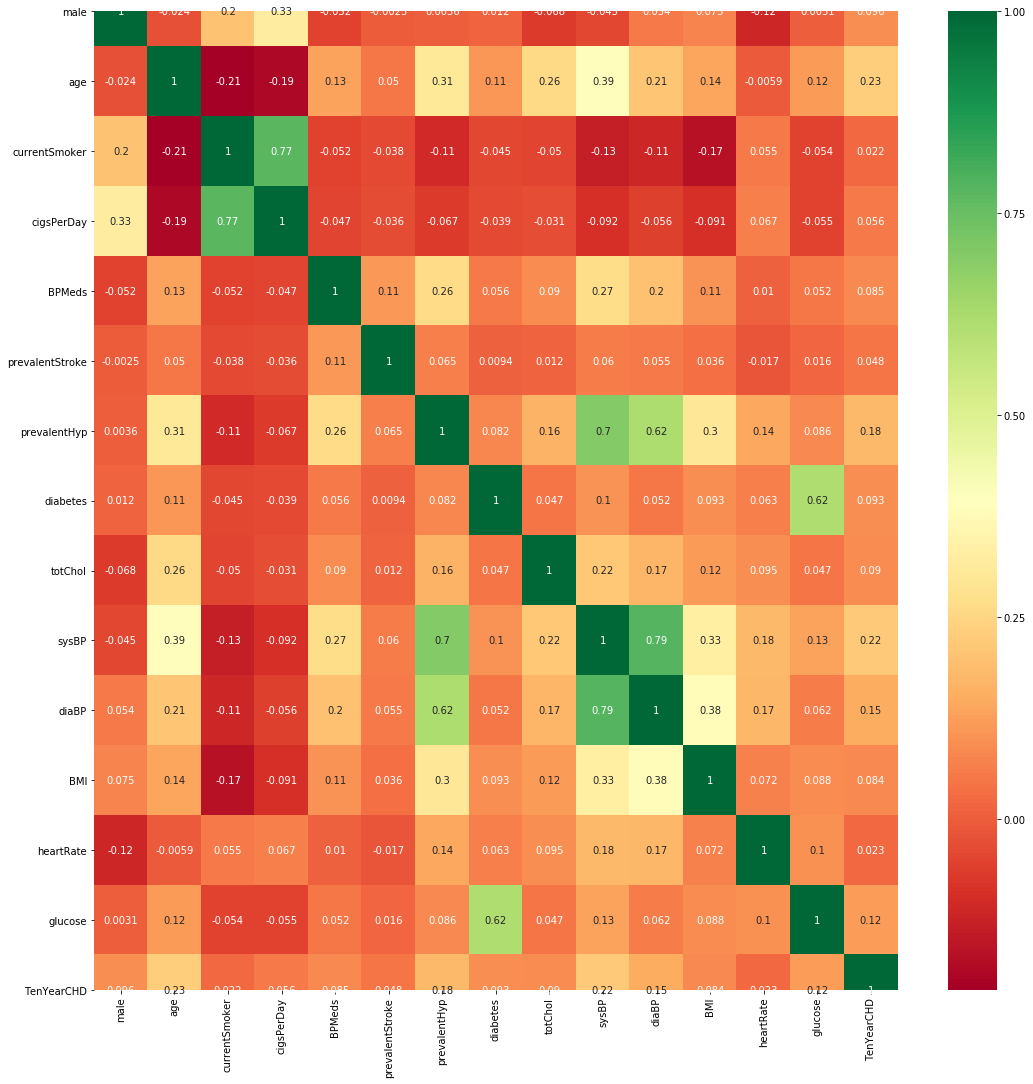

In [2]:
# Finding the correlation of the between independent and dependent variable
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

- **Obsevation** 
- Diabetes and glucose are highly corelated ,Need to drop diabetes coloums because the target variale is highly dependent on glucose coloumn
- SysBP, prevalentHyp and dialBP are highly corelated ,Need to drop prevalentHyp and diaBP coloums because the target variale is highly dependent on SysBP coloumn
- Drop all the values less than 0.09

In [3]:
# Divide the data into dependent and independent variable
X=df.iloc[:,:-1] # Independent variables
y=df.iloc[:,-1]


In [5]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state= 42)

In [8]:
!pip install xgboost


In [9]:
import xgboost as xgb
from xgboost import XGBClassifier

In [10]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
#Prediction of train data
pred_xgb_train = model.predict(x_train)

# Accuracy of train data
accuracy_xgb_train = accuracy_score(y_train,pred_xgb_train)
print('accuracy_DT_train', accuracy_xgb_train)

#Prediction of test data
pred_xgb_test = model.predict(x_test)

# Accuracy of test data
accuracy_xgb_test = accuracy_score(y_test,pred_xgb_test)
print('accuracy_DT_test', accuracy_xgb_test)

accuracy_DT_train 0.9966666666666667
accuracy_DT_test 0.8122503328894807


### **Metrics**

In [12]:
# Confusion Matrix
conf_mat_xgb = confusion_matrix(y_test,pred_xgb_test)
conf_mat_xgb

array([[595,  27],
       [114,  15]], dtype=int64)

In [13]:
true_positive_DT = conf_mat_xgb[0][0]
false_positive_DT = conf_mat_xgb[0][1]
false_negative_DT = conf_mat_xgb[1][0]
true_negative_DT = conf_mat_xgb[1][1]

In [14]:
# Precison log reg
Precision_DT = true_positive_DT/(true_positive_DT+false_positive_DT)
# Recall log reg
Recall_DT = true_positive_DT/(true_positive_DT+false_negative_DT) 
# F1 Score of log reg
F1_Score_DT = 2*(Recall_DT * Precision_DT) / (Recall_DT + Precision_DT)
print('Precision_DT',Precision_DT)
print('Recall_DT', Recall_DT)
print ('F1_Score_DT',F1_Score_DT)

Precision_DT 0.9565916398713826
Recall_DT 0.8392101551480959
F1_Score_DT 0.8940646130728775


## **Area Under The Curve (AUC)**
The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the better

In [15]:
# Area Under Curve
auc_DT= roc_auc_score(y_test, pred_xgb_test)
auc_DT

0.5364353548194123

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, pred_xgb_test)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-Mean=0.334


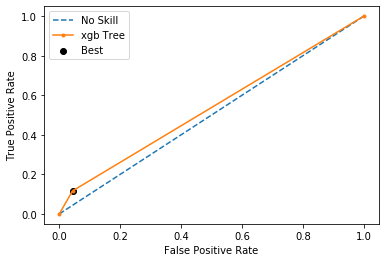

In [17]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='xgb Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

## **Hyperparameter tuning**

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [20]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [22]:
grid.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:13:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.854, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:13:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through 

[CV]   learning_rate=1, max_depth=5, n_estimators=50, score=0.845, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=50 ..................
[15:13:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=5, n_estimators=50, score=0.839, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=50 ..................
[15:13:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.831, total=   0.3s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 ................
[15:13:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.836, total=   0.3s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[15:13:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=1, max_depth=20, n_estimators=200, score=0.832, total=   0.5s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[15:13:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=0.854, total=   0.0s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[15:13:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.845, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[15:13:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.839, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[15:13:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.5, max_depth=10, n_estimators=100, score=0.840, total=   0.3s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100 ..............
[15:13:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=10, n_estimators=100, score=0.831, total=   0.3s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100 ..............
[15:13:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.832, total=   0.7s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[15:13:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.827, total=   0.6s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[15:13:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.845, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[15:13:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.839, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[15:13:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.1, max_depth=10, n_estimators=100, score=0.840, total=   0.3s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=100 ..............
[15:13:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=10, n_estimators=100, score=0.831, total=   0.3s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=100 ..............
[15:13:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.1, max_depth=20, n_estimators=200, score=0.832, total=   0.5s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200 ..............
[15:13:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=20, n_estimators=200, score=0.827, total=   0.5s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200 ..............
[15:13:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.845, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[15:13:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.839, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[15:13:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.01, max_depth=10, n_estimators=100, score=0.840, total=   0.3s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100 .............
[15:13:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=10, n_estimators=100, score=0.831, total=   0.3s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100 .............
[15:13:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.01, max_depth=20, n_estimators=200, score=0.832, total=   0.5s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=200 .............
[15:14:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=20, n_estimators=200, score=0.827, total=   0.5s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=200 .............
[15:14:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=0.845, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[15:14:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=0.839, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[15:14:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.001, max_depth=10, n_estimators=100, score=0.840, total=   0.3s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100 ............
[15:14:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=10, n_estimators=100, score=0.831, total=   0.3s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100 ............
[15:14:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.832, total=   0.5s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[15:14:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.827, total=   0.5s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[15:14:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   48.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_con...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='war

In [25]:
# To  find the parameters givingmaximum accuracy
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 10}

In [26]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 10)
new_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
#Prediction of train data
pred_xgb_train = new_model.predict(x_train)

# Accuracy of train data
accuracy_xgb_train = accuracy_score(y_train,pred_xgb_train)
print('accuracy_DT_train', accuracy_xgb_train)

#Prediction of test data
pred_xgb_test = new_model.predict(x_test)

# Accuracy of test data
accuracy_xgb_test = accuracy_score(y_test,pred_xgb_test)
print('accuracy_DT_test', accuracy_xgb_test)

accuracy_DT_train 0.8793333333333333
accuracy_DT_test 0.8229027962716379


In [28]:
# Confusion Matrix
conf_mat_xgb = confusion_matrix(y_test,pred_xgb_test)
conf_mat_xgb

array([[604,  18],
       [115,  14]], dtype=int64)

In [29]:
# Precison log reg
Precision_DT = true_positive_DT/(true_positive_DT+false_positive_DT)
# Recall log reg
Recall_DT = true_positive_DT/(true_positive_DT+false_negative_DT) 
# F1 Score of log reg
F1_Score_DT = 2*(Recall_DT * Precision_DT) / (Recall_DT + Precision_DT)
print('Precision_DT',Precision_DT)
print('Recall_DT', Recall_DT)
print ('F1_Score_DT',F1_Score_DT)

Precision_DT 0.9565916398713826
Recall_DT 0.8392101551480959
F1_Score_DT 0.8940646130728775


In [30]:
# Area Under Curve
auc_DT= roc_auc_score(y_test, pred_xgb_test)
auc_DT

0.539794112515267

## Conclusion

- After hyperparameter tuning , the accuary is high for both train and test data but the area under curve is not accetebale
- If we look into the confusion matrix type-II (False Negatives) error is high because this could be that the data set is imbalaced(0's is high and 1's is low)